<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

In [1]:
##### Your Code Here #####
import numpy as np

np.random.seed(812)

X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [0,1,0],
              [1,0,0],
              [1,1,1],
              [0,0,0]
             ])

y = np.array([[0],
              [1],
              [1],
              [1],
              [1],
              [0],
              [0]
             ])

In [6]:
class NeuralNetwork:
    
    def __init__(self):
        # set architecture of neural network
        self.inputs = 3
        self.hiddenNodes = 4
        self.outputNodes = 1
        
        #initial weights
        
        # 3x4 matrix array for the first layer
        self.weights1 = np.random.randn(self.inputs, self.hiddenNodes)
        
        # 4x1 matrix array for the hidden to output
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)
        
    def sigmoid(self, s):
        return 1 / (1 + np.exp(-s))
    
    def sigmoidPrime(self, s):
        return s * (1-s)
    
    def feed_forward(self, X):
        """ calc the NN inference using feed forward pass"""
        # weighted sum of inputs and hidden layers
        self.hidden_sum = np.dot(X, self.weights1)
        
        # activate of the weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # weighted sum of hidden layer to output layer
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    def backword(self, X, y, o):
        self.o_error = y - o # error in output
        # size if adjustment from output to hidden
        self.o_delta = self.o_error * self.sigmoidPrime(o) # apply derivate of sigmoid to error
        # z2 error: how much out input => hidden weights weights were off
        self.z2_error = self.o_delta.dot(self.weights2.T)
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.activated_hidden)
        
        # adjustmen input => hidden weights
        self.weights2 += self.activated_hidden.T.dot(self.o_delta)
        
        # adjustment hidden => output weights
        self.weights1 += X.T.dot(self.z2_delta)
        
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backword(X, y, o)

In [10]:
nn = NeuralNetwork()

for i in range(10000):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % 500 == 0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Input: \n', X)
        print('Actual Output: \n', y)
        print('Predicted Output: \n', str(nn.feed_forward(X)))
        print("Loss: \n", str(np.mean(np.square(y - nn.feed_forward(X)))))
    nn.train(X,y)

+---------EPOCH 1---------+
Input: 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 0]]
Actual Output: 
 [[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
Predicted Output: 
 [[0.75637419]
 [0.75574639]
 [0.88251657]
 [0.77589941]
 [0.89566508]
 [0.88199618]
 [0.80580577]]
Loss: 
 0.3048444491548256
+---------EPOCH 2---------+
Input: 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 0]]
Actual Output: 
 [[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
Predicted Output: 
 [[0.69733451]
 [0.69426574]
 [0.8428235 ]
 [0.72410001]
 [0.86352097]
 [0.83606527]
 [0.76075017]]
Loss: 
 0.2824209413976105
+---------EPOCH 3---------+
Input: 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 0]]
Actual Output: 
 [[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
Predicted Output: 
 [[0.63534625]
 [0.63025259]
 [0.795031  ]
 [0.6690972 ]
 [0.82470041]
 [0.78067093]
 [0.71111293]]
Loss: 
 0.2625350863917618
+---------EPOCH 4---------+
Input: 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 0]]

## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


In [ ]:
##### Your Code Here #####

In [13]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [16]:
X = X / 255

In [17]:
y_new = np.zeros(y.shape)
y_new[np.where(y == 0.0)[0]] = 1
y = y_new

In [18]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
y_train, y_test = y[:m].reshape(1,m), y[m:].reshape(1,m_test)

In [19]:
shuffle_index = np.random.permutation(m)
X_train, y_train = X_train[:,shuffle_index], y_train[:,shuffle_index]

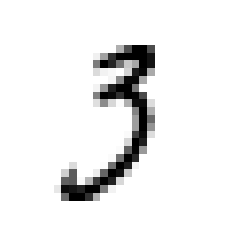

[0.]


In [20]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

i = 3
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[:,i])

In [21]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [22]:
def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )

    return L

In [23]:
learning_rate = 1

X = X_train
Y = y_train

n_x = X.shape[0]
m = X.shape[1]

W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1, 1))

for i in range(2000):
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z)

    cost = compute_loss(Y, A)

    dW = (1/m) * np.matmul(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y, axis=1, keepdims=True)

    W = W - learning_rate * dW
    b = b - learning_rate * db

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  0.6935260200116615
Epoch 100 cost:  1.4742762840385619e-05
Epoch 200 cost:  1.4529229248877762e-05
Epoch 300 cost:  1.4322269011090894e-05
Epoch 400 cost:  1.4121574963460405e-05
Epoch 500 cost:  1.3926859037550351e-05
Epoch 600 cost:  1.3737850787826933e-05
Epoch 700 cost:  1.35542960542188e-05
Epoch 800 cost:  1.3375955745240494e-05
Epoch 900 cost:  1.3202604729138118e-05
Epoch 1000 cost:  1.3034030822004858e-05
Epoch 1100 cost:  1.2870033863079e-05
Epoch 1200 cost:  1.2710424868555614e-05
Epoch 1300 cost:  1.2555025256218111e-05
Epoch 1400 cost:  1.240366613404843e-05
Epoch 1500 cost:  1.2256187646717566e-05
Epoch 1600 cost:  1.2112438374519678e-05
Epoch 1700 cost:  1.1972274779884354e-05
Epoch 1800 cost:  1.1835560697121808e-05
Epoch 1900 cost:  1.1702166861493328e-05
Final cost: 1.157325699874869e-05


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

Z = np.matmul(W.T, X_test) + b
A = sigmoid(Z)

predictions = (A>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels))

[[10000]]


In [25]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [26]:
X = X_train
Y = y_train

n_x = X.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(1, n_h)
b2 = np.zeros((1, 1))

for i in range(2000):

    Z1 = np.matmul(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = sigmoid(Z2)

    cost = compute_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if i % 100 == 0:
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  0.9918490442609752
Epoch 100 cost:  0.00027269516176493434
Epoch 200 cost:  0.0001745640442031027
Epoch 300 cost:  0.00012732569698365012
Epoch 400 cost:  9.965138873360573e-05
Epoch 500 cost:  8.155321337406222e-05
Epoch 600 cost:  6.884482077348286e-05
Epoch 700 cost:  5.946134790731514e-05
Epoch 800 cost:  5.2267393209551534e-05
Epoch 900 cost:  4.6587944330046356e-05
Epoch 1000 cost:  4.199727637121972e-05
Epoch 1100 cost:  3.8214113982809496e-05
Epoch 1200 cost:  3.504548420733968e-05
Epoch 1300 cost:  3.235479201715884e-05
Epoch 1400 cost:  3.0042762056886268e-05
Epoch 1500 cost:  2.8035590175500262e-05
Epoch 1600 cost:  2.6277319544148414e-05
Epoch 1700 cost:  2.4724787781853866e-05
Epoch 1800 cost:  2.3344190659254144e-05
Epoch 1900 cost:  2.2108691598373675e-05
Final cost: 2.100729346437934e-05


## Stretch Goals: 

- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?